<a href="https://colab.research.google.com/github/CorentinMAG/AI/blob/master/iris_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Scikits-Learn est une librairie d'apprentissage automatique couvrant l'ensemble de la discipline:

* Les types d'apprentissage : supervisé, non supervisé, par renforcement, par transfert
* Les algorithmes :
> * Linear Regression (régression linéaire),
> * Logistic Regression (régression logistique),
> * Decision Tree (arbre de décision),
> * SVM (machines à vecteur de support),
> * Naive Bayes (classification naïve bayésienne),
> * KNN (Plus proches voisins),
> * Dimensionality Reduction Algorithms (PCA, ...),
> * Gradient Boost & Adaboost,
> * Réseaux de neuronnes

Vos données sont représentées par des tableaux à 2 dimensions. Typiquement, des tableaux Numpy ou Pandas ou Python


L'algorithme de prédiction est représenté par une classe.

* Vous devez commencer par choisir l'algorithme à utiliser , que nous appelerons prédicteur/classifieur/estimator. Les algorithmes sont des classes Python. Les données sont toujours des tableaux Numpy/Scipy/Pandas/Python
* Vous précisez ses éventuels paramètres, appelés hyperparamètres en instanciant la classe
* Vous l'alimentez avec la fonction fit dans le cas d'un apprentissage supervisé
* Vous lancez la prédiction sur un ensemble de valeurs via la fonction predict parfois appelée transform dans le cas de l'apprentissage non supervisé





# Classer les plantes
On va utiliser la bdd d'iris de scikit

Ces iris ont été classés à l'aide d'une clé d'identification des plantes (type de pétales, sépale, type des feuilles, forme des feuilles, ...)

Puis, pour chaque fleur classée, les longueurs et largeurs des sépales et pétales ont été mesurés.

L'objectif consiste à demander à l'ordinateur de déterminer automatiquement l'espèce d'une nouvelle plante en fonction de la mesure des dimensions de ses sépales et pétales. Pour cela nous lui demanderons de construire sa décision à partir de la connaissance extraite des mesures dans la bdd.

Autrement dit, nous allons donner à l'ordinateur un jeu de données déjà classées et lui demander de classer de nouvelles données à partir de celui-ci.

C'est un cas d'apprentissage supervisé (mais nous le transformerons aussi en non supervisé).

Une fois alimenté avec les observations connues, nos prédicteurs vont chercher à identifier des groupes parmi les plantes déjà connues et détermineront quel est le groupe qui se rapproche le plus de notre observation.

In [1]:
#chargement de la bdd
from sklearn import datasets
iris = datasets.load_iris()
print(dir(iris)) # retourne les attributs de l'objet iris
print(iris.feature_names) # retourne le nom des paramètres de nos données/enregistrements
print(iris.data[:5]) # affiche les 5 premiers enregistrements
print(iris.target_names) # les différents labels pour nos plantes
print(iris.target) # tableau indiquant le numéro de l'espèce de chaque enregistrement (0 = setosa, 1 = versicolor, 2 = virginica) 
print(iris.target.size) # le tableau contient 150 valeurs (c'est une matrice ligne), il y a donc 150 enregistrements
print(iris.data.shape) # iris.data est une matrice de 150 lignes et de 4 colonnes, 150 enregistrements avec 4 paramètres
for i in [0,1,2]:
    print("classe : %s, nb exemplaires: %s" % (i, len(iris.target[ iris.target == i]) ) )

['DESCR', 'data', 'feature_names', 'filename', 'frame', 'target', 'target_names']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
150
(150, 4)
classe : 0, nb exemplaires: 50
classe : 1, nb exemplaires: 50
classe : 2, nb exemplaires: 50


[]

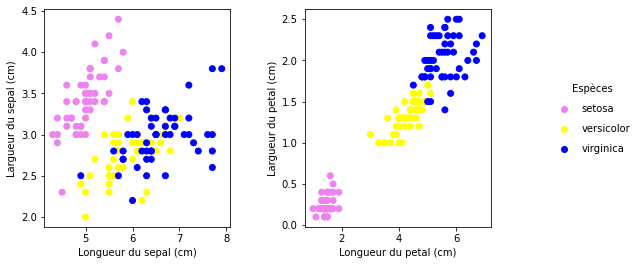

In [2]:
#Visualisation des données
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

fig = plt.figure(figsize=(8, 4))  #dimension de la figure en inch
fig.subplots_adjust(hspace=0.4, wspace=0.4) #padding entre les graphes
ax1 = plt.subplot(1,2,1) #ajoute un graphique à la figure (rows,cols,index)

clist = ['violet', 'yellow', 'blue']
colors = [clist[c] for c in iris.target]

#iris.data[:,0] on récupère la 1er colonne de chaque enregistrement (longueur du sépale)
#iris.data[:,1] on récupère la 2er colonne de chaque enregistrement (largeur du sépale)
ax1.scatter(iris.data[:, 0], iris.data[:, 1], color=colors)
plt.xlabel('Longueur du sepal (cm)')
plt.ylabel('Largueur du sepal (cm)')

ax2 = plt.subplot(1,2,2)
plt.scatter(iris.data[:, 2], iris.data[:, 3], color=colors)

plt.xlabel('Longueur du petal (cm)')
plt.ylabel('Largueur du petal (cm)')

# Légende
for ind, s in enumerate(iris.target_names):
    # on dessine de faux points, car la légende n'affiche que les points ayant un label
    plt.scatter([], [], label=s, color=clist[ind])

plt.legend(scatterpoints=1, frameon=False, labelspacing=1
           , bbox_to_anchor=(1.8, .5) , loc="center right", title='Espèces')
plt.plot()

la séparation des groupes entre les longueurs et largeurs de pétales semble très nette et déterminante !

Nous pourrions aussi le faire entre les longueurs de pétales et largeurs de sépales et inversement même si cela semble moins naturel.

La librairie Seaborn propose une matrice prête à l'emploi via le graphique Scatterplot Matrix pour réaliser ce type de graphique:

In [3]:
import seaborn as sns
import pandas as pd
sns.set()
df = pd.DataFrame(iris.data, columns=iris.feature_names )
df['target'] = iris.target
df['label'] = df.apply(lambda x: iris.target_names[int(x.target)], axis=1)
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,label
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


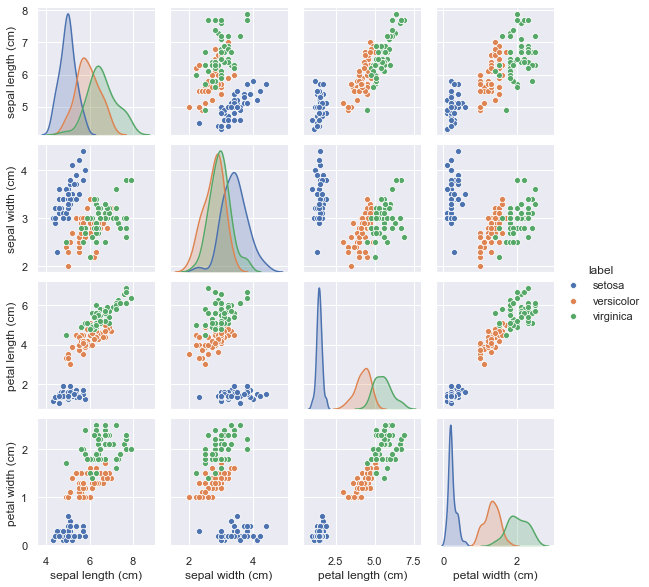

In [4]:
sns.pairplot(df, hue='label', vars=iris.feature_names, height=2);

# Apprentissage

C'est de la classification qu'on cherche à faire. On peut commencer par l'algorithme naive Bayes

In [5]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB() # création du modèle (pas besoin de paramètres)

clf.fit(iris.data, iris.target) # apprentissage avec nos données

result = clf.predict(iris.data) # on décide d'exécuter la prédiction sur les données de la bdd
print(result)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


# Qualité de la prédiction

est ce que nos prédictions sont en adéquations avec ce qu'on a dans le base ?

In [6]:
print(result - iris.target)
# la ou on a 0 il n'y a pas d'erreur
# par contre on voit qu'avec l'algorithme naive bayes ont a des différences sur certains échantillons
errors = sum(result != iris.target) # 6 erreurs sur 150 mesures
print("Nb erreurs:", errors)
print( "Pourcentage de prédiction juste:", (150-errors)*100/150) 

#ou bien avec une fonction de scikit
from sklearn.metrics import accuracy_score
print(accuracy_score(result, iris.target))

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0
  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0 -1
  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0]
Nb erreurs: 6
Pourcentage de prédiction juste: 96.0
0.96


[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]


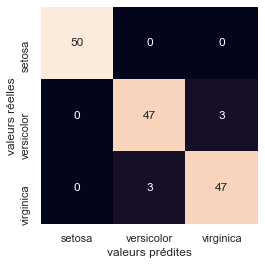

In [7]:
#scikit permet de calculer la matrice de confusion
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(iris.target, result)
print(conf)


#seaborn permet de faire la même chose mais avec le heatmap
sns.heatmap(conf, square=True, annot=True, cbar=False
            , xticklabels=list(iris.target_names)
            , yticklabels=list(iris.target_names))
plt.xlabel('valeurs prédites')
plt.ylabel('valeurs réelles');

#sur nos 50 setosa, l'algorithme naive bayes à réussit à les tous les identifier
#mais on voit qu'il a confondu 3 versicolor avec des viginica et inversement

# Séparation du jeu de test et d'apprentissage

On ne dispose que d'un seul jeu de données connues.

Généralement, on test l'algorithme sur de nouvelles données, sinon les résultats sont forcéments toujours très bon.

In [8]:
#séparation des données
data_test , target_test = iris.data[::2] , iris.target[::2]  #les données testées seront les enregistrements d'indices pairs 
data_train, target_train = iris.data[1::2], iris.target[1::2] #les données entrainées seront les enregistrements d'indices impaires

cependant mettre les éléments pairs pour le test et les impaires pour l'apprentissage n'est pas très pertinent. En effet il se pourrait que dans l'apprentissage une catégorie de fleur ne soit pas représentée.

Scikit possède une fonction pour séparer le jeu de données du jeu de test

In [9]:
from sklearn.model_selection import train_test_split

# split the data with 50% in each set
data_test = train_test_split(iris.data, iris.target, random_state=0, train_size=0.5)
data_train, data_test, target_train, target_test = data_test

maintenant on peut relancer l'algorithme naive bayes pour voir s'il y a des changements

[2 1 0 2 0 2 0 1 1 1 1 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0 1 2 2 1 2 1 2 1 1 2 1 1 2 1 2 1 0 2 1 1 1 1 2 0 0 2 1 0 0
 1]
Pourcentage de prédictions juste: 0.9466666666666667


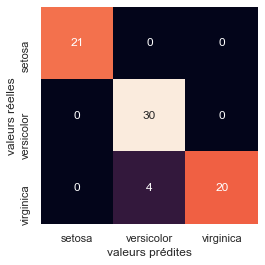

In [10]:
clf = GaussianNB()
clf.fit(data_train, target_train)
result = clf.predict(data_test)
print(result)
print("Pourcentage de prédictions juste: {}".format(accuracy_score(result, target_test))) #le résultat est un peu plus faible mais toujours très bon

# Matrice de confusion
# On voit que 4 virginica a été confondu avec des versicolors
conf = confusion_matrix(target_test, result)
conf

sns.heatmap(conf, square=True, annot=True, cbar=False
            , xticklabels=list(iris.target_names)
            , yticklabels=list(iris.target_names))
plt.xlabel('valeurs prédites')
plt.ylabel('valeurs réelles');

# Territoires de la classification

* Nous construisons un maillage de toutes les combinaisons possibles des longueurs et largeurs des sépales comprises entre leurs valeurs min/max

* Pour chaque couple de point (longueur, largeur) compris entre les min/max observés nous demandons de prédire l'espèce de la fleur

* Nous affichons sur la carte les prédictions réalisées (une couleur pour chaque point)

In [11]:
data = iris.data[:,:2] #dans tous les enregistrements, on prend uniquement le 1er et le 2nd élément (que longueur/largeur des sépales)
print(data[:5])

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]


In [12]:
# On réapprend
clf = GaussianNB()
clf.fit(data, iris.target)
h = .15
# Nous recherchons les valeurs min/max de longueurs/largeurs des sépales
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1 #longueur min et max
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1 #largeur min et max

x = np.arange(x_min, x_max, h) #retourne un intervalle entre x_min et x_max avec un pas de h
y = np.arange(y_min, y_max, h)
print(x_min,x_max,y_min,y_max)

3.3 8.9 1.0 5.4


on va maintenant créer une matrice contenant tous les points situés entre les valeurs minimales et maximales des longueurs et largeurs des sépales

In [13]:
xx, yy = np.meshgrid(x,y ) #le tableau xx contient le tableau x répété y.size = 30 fois
                           #le tableau yy contient 38 tableaux de chaque élément de y répété x.size = 38 fois
                           # il s'agit de faire toutes les combinaisons possibles entre x et y

#La fonction zip génère une liste de n-uplets constituée des éléments du même rang de chaque liste reçue en paramètre
#la fonction ravel() applatit un tableau à n dimensions en 1 dimension
data_samples = list(zip(xx.ravel(), yy.ravel()) ) 

print(data_samples[:10]) # on visualise notre jeu de données

[(3.3, 1.0), (3.4499999999999997, 1.0), (3.5999999999999996, 1.0), (3.7499999999999996, 1.0), (3.8999999999999995, 1.0), (4.049999999999999, 1.0), (4.199999999999999, 1.0), (4.35, 1.0), (4.499999999999999, 1.0), (4.649999999999999, 1.0)]


maintenant, le but est de déterminer l'espèce de ces différentes fleurs grâce à leur longueur/largeur de sépale

<ipython-input-14-e2d863206329>:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z) # Affiche les déductions en couleurs pour les couples x,y


[]

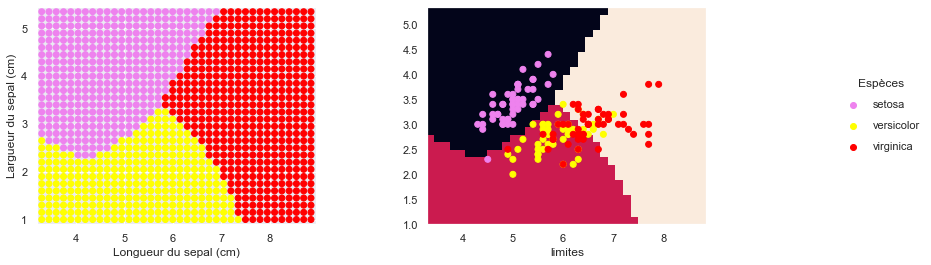

In [14]:
Z = clf.predict(data_samples)

fig = plt.figure(figsize=(12, 4))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax1 = plt.subplot(1,2,1)

# Plot also the training points
colors = ['violet', 'yellow', 'red']
C = [colors[x] for x in Z]

plt.scatter(xx.ravel(), yy.ravel(), c=C)
plt.xlim(xx.min() - .1, xx.max() + .1)
plt.ylim(yy.min() - .1, yy.max() + .1)
plt.xlabel('Longueur du sepal (cm)')
plt.ylabel('Largueur du sepal (cm)');

ax2 = plt.subplot(1,2,2)
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z) # Affiche les déductions en couleurs pour les couples x,y
colors = ['violet', 'yellow', 'red']
C = [colors[x] for x in iris.target]
plt.scatter(data[:, 0], data[:, 1], c=C)
plt.xlabel('limites')

# Légende
for ind, s in enumerate(iris.target_names):
    # on dessine de faux points, car la légende n'affiche que les points ayant un label
    plt.scatter([], [], label=s, color=colors[ind])

plt.legend(scatterpoints=1, frameon=False, labelspacing=1
           , bbox_to_anchor=(1.8, .5) , loc="center right", title='Espèces')

plt.plot()


Cette image, n'est autre que votre clef de détermination: Imprimez-là et partez identifier les fleurs sur le terrain : mesurez les longueurs/largeurs de sépales, recherchez-les sur le graphique, la couleur du point vous donne l'espèce !

# apprentissage supervisé avec KN

au lieu d'utiliser naive Bayes on va utiliser l'algorithme KN

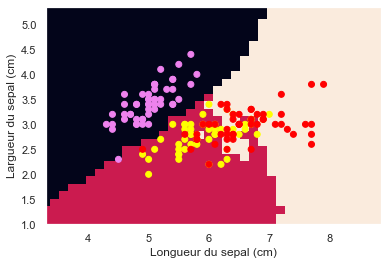

In [21]:
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier()

from ipywidgets import interact
@interact(n=(1,20))  
def n_change(n=5):
    clf = neighbors.KNeighborsClassifier(n_neighbors=n)
    clf.fit(data, iris.target)
    Z = clf.predict(data_samples)
    plt.figure(1)
    plt.pcolormesh(xx, yy, Z.reshape(xx.shape),shading='auto') # Affiche les déductions en couleurs pour les couples x,y
    # Plot also the training points
    colors = ['violet', 'yellow', 'red']
    C = [colors[x] for x in iris.target]
    plt.scatter(data[:, 0], data[:, 1], c=C)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('Longueur du sepal (cm)')
    plt.ylabel('Largueur du sepal (cm)');

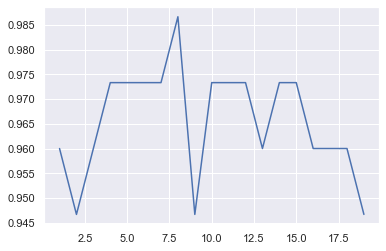

In [16]:
#calcul de la précision en fonction de n 
# la prédiction semble la meilleure pour N = 8
data_test, target_test = iris.data[::2], iris.target[::2]
data_train, target_train = iris.data[1::2], iris.target[1::2]
result = []
n_values = range(1,20)
for n in n_values:
    clf = neighbors.KNeighborsClassifier(n_neighbors=n)
    clf.fit(data_train, target_train)
    Z = clf.predict(data_test)
    score = accuracy_score(Z, target_test)
    result.append(score)

plt.plot(list(n_values), result)

# apprentissage non supervisé

**si on supprime la donnée iris.target nous tombons dans le cas de d'algorithmes de clustering**: nous pouvons toujours demander à ce que notre algorithme sépare nos données en 3 groupes sans connaissance de leurs véritables étiquettes.

Saura-t-il retrouver les groupes initiaux ?

Dans le cas des algorithmes non supervisés il est très fréquent de disposer de très grandes quantités de paramètres. Ne sachant pas encore qui est responsable de quoi on a tendance à tout livrer à la machine.

Cela pose 2 problèmes:

* **La visualisation des données, au delà de 3 paramètres notre cerveau est bien mal outillé pour se représenter les données**
* La complexité des calculs, plus le nombre de paramètres est grand, plus nous aurons des calculs complexes et longs
* **Pour contourner ces problèmes il est courant de réduire la dimension du vecteur de données à quelque chose de plus simple**. La difficulté est alors de réduire le nombre de paramètres tout en conservant l'essentiel de l'information, notamment les variations succeptibles de permettre le regroupement des données.

Il existe plusieurs techniques de réduction, comme par exemple **l'analyse en composante principale**

* Vous définissez le nombre de paramètres
* Vous alimentez l'algorithme avec les données à réduire
* Vous lancez la prédiction ici appelée réduction/transformation

Ici on à 4 paramètres qu'on va essayer de réduire

In [17]:
from sklearn.decomposition import PCA
# Définition de l'hyperparamètre du nombre de composantes voulues
model = PCA(n_components=2)
# Alimentation du modèle
model.fit(iris.data)
# Transformation avec ses propres données
reduc = model.transform(iris.data)


print('données originales')
print(iris.data[:5])
print('\n')
print('données réduites')
print(reduc[:5])

données originales
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


données réduites
[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]]


Nous venons de réduire notre vecteur de 4 paramètres en 1 vecteur de 2 paramètres dont les variations sont censées être similaires.

Autrement dit nous devrions être capable de classer nos fleurs avec ces vecteurs réduits en ayant une qualité proche de celle utilisant les vecteurs originaux !

In [18]:
#on ajoute l'analyse en composante principale dans notre tableau
df['PCA1'] = reduc[:,0]
df['PCA2'] = reduc[:,1]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,label,PCA1,PCA2
0,5.1,3.5,1.4,0.2,0,setosa,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,setosa,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,setosa,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,setosa,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,setosa,-2.728717,0.326755


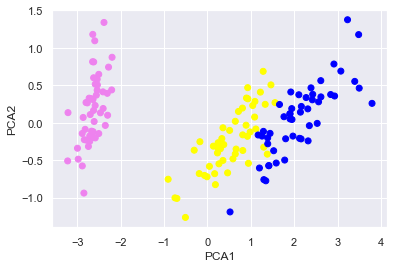

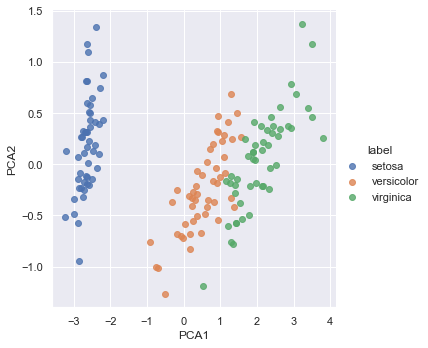

In [19]:
#on affiche les couples de points (PCA1,PCA2)
colors = ['violet', 'yellow', 'blue']
plt.scatter(df['PCA1'], df['PCA2'], c=[ colors[c] for c in df['target'] ]);
plt.xlabel('PCA1')
plt.ylabel('PCA2');

#ou avec seaborn
sns.lmplot("PCA1", "PCA2", hue='label', data=df, fit_reg=False);

Maintenant, ce nouveau classement peut-il permettre un bon regroupement des 3 espèces ? le graphique semble le confirmer, vérifions cela avec le clustering

# Clustering 

plusieurs algorithmes existent: 
* k-means (se rapproche de KNN mais surtout efficace sur les données organisés en cercles)

* GMM
* spectral clustering
* mean shift

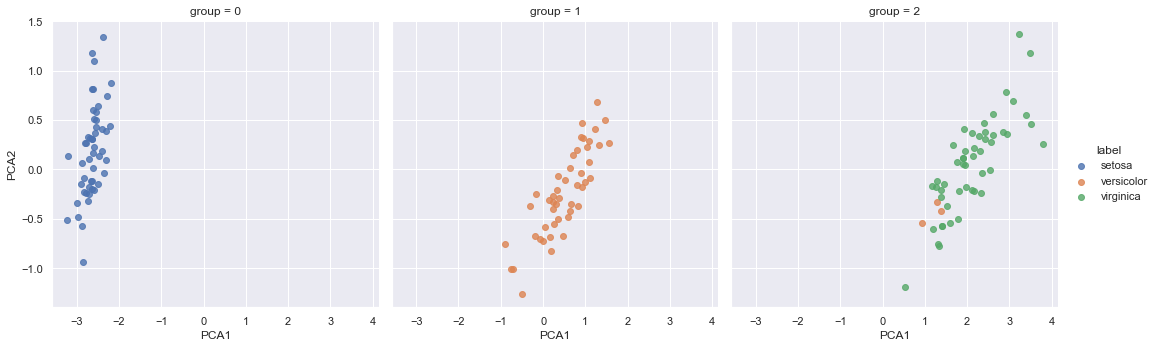

In [20]:
from sklearn.mixture import GaussianMixture
# Création du modèle avec 3 groupes de données
model = GaussianMixture (n_components=3, covariance_type='full')
# Apprentissage, il n'y en a pas vraiment
model.fit(df[['PCA1', 'PCA2']])
# Prédiction
groups = model.predict(df[['PCA1', 'PCA2']])

#La prédiction étant faîte, pour chaque groupe généré nous affichons 
#la couleur réelle des espèces, si le clustering a été efficace, il n'y aura qu'une seule couleur par groupe:
df['group'] = groups
sns.lmplot("PCA1", "PCA2", data=df, hue='label',
           col='group', fit_reg=False);

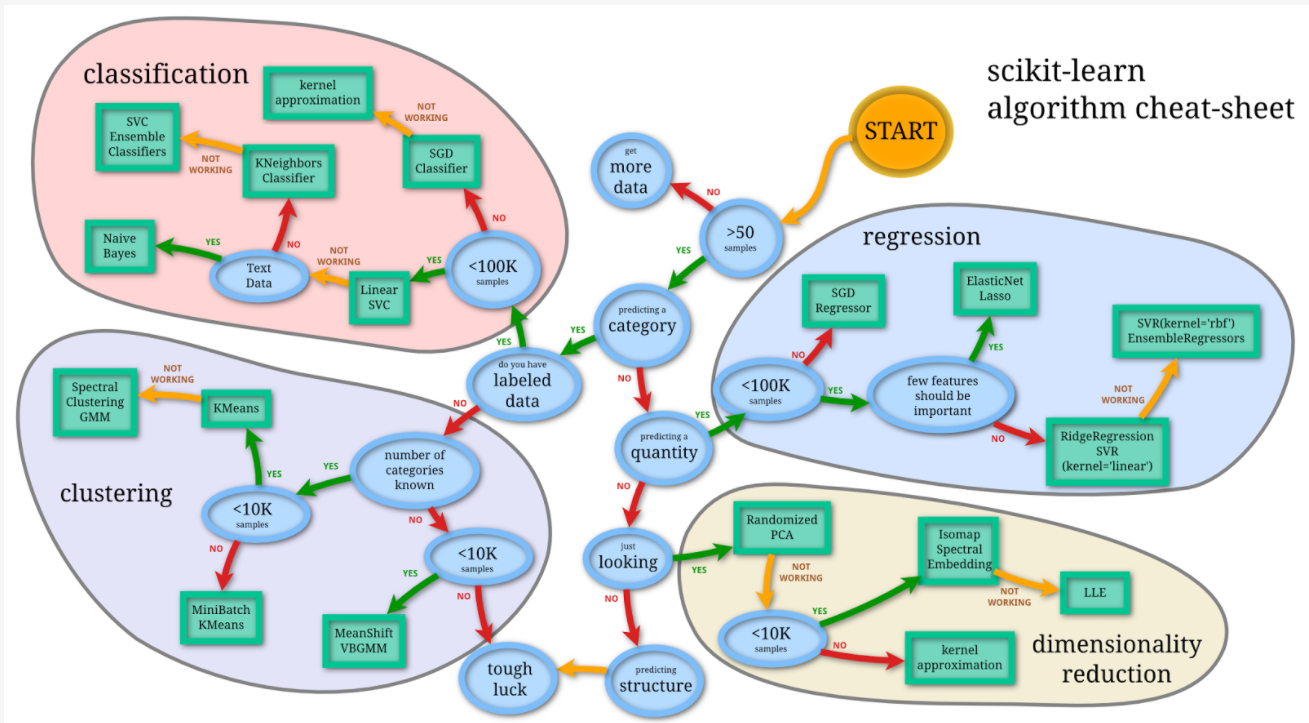